# Students Performance in Exams

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data set

In [2]:
students = pd.read_csv('StudentsPerformance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The dataset consists of math, reading and writing scores of students along with some influencing factors such as gender, race, parents education, lunch type, and if the student took test preparation courses.

In [3]:
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no null values in any of the columns.

In [4]:
count = 0
for i in students['parental level of education'].unique():
    count = count + 1
    print(count, '. ', i)

1 .  bachelor's degree
2 .  some college
3 .  master's degree
4 .  associate's degree
5 .  high school
6 .  some high school


In [5]:
students['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [6]:
students.groupby(['race/ethnicity','parental level of education']).describe()

math score                        \
                                                count       mean        std   
race/ethnicity parental level of education                                    
group A        associate's degree                14.0  61.000000  17.168845   
               bachelor's degree                 12.0  67.166667  14.989896   
               high school                       18.0  60.444444  11.490263   
               master's degree                    3.0  57.666667  13.279056   
               some college                      18.0  63.888889  15.911109   
               some high school                  24.0  58.916667  14.206296   
group B        associate's degree                41.0  66.097561  14.867422   
               bachelor's degree                 20.0  69.300000  12.401613   
               high school                       48.0  59.791667  15.631336   
               master's degree                    6.0  67.166667  16.485347   
               some college                      37.0  63.189189  15.280412   
               some high school                  38.0  61.815789  16.771687   
group C        associate's degree                78.0  66.730769  14.177605   
               bachelor's degree                 40.0  68.150000  15.999279   
               high school                       64.0  60.906250  14.776342   
               master's degree                   19.0  67.052632  13.389356   
               some college                      69.0  65.130435  14.588385   
               some high school                  49.0  60.551020  14.842312   
group D        associate's degree                50.0  67.600000  14.691383   
               bachelor's degree                 28.0  67.571429  14.088158   
               high school                       44.0  62.863636  12.821840   
               master's degree                   23.0  72.521739  15.287754   
               some college                      67.0  68.731343  11.890386   
               some high school                  50.0  66.760000  14.538562   
group E        associate's degree                39.0  74.897436  15.324207   
               bachelor's degree                 18.0  76.555556  15.819654   
               high school                       22.0  70.772727  14.790382   
               master's degree                    8.0  74.625000  17.951820   
               some college                      35.0  73.828571  14.141066   
               some high school                  18.0  72.111111  19.210564   

                                                                             \
                                             min    25%   50%    75%    max   
race/ethnicity parental level of education                                    
group A        associate's degree           37.0  48.75  62.5  66.50   97.0   
               bachelor's degree            45.0  57.00  65.0  77.75   91.0   
               high school                  34.0  53.50  60.0  70.25   77.0   
               master's degree              50.0  50.00  50.0  61.50   73.0   
               some college                 28.0  54.50  61.0  74.25  100.0   
               some high school             38.0  47.00  59.0  66.50   92.0   
group B        associate's degree           40.0  53.00  65.0  80.00   94.0   
               bachelor's degree            48.0  61.75  66.5  75.50   97.0   
               high school                   8.0  51.50  62.0  70.25   87.0   
               master's degree              49.0  53.50  67.5  77.00   90.0   
               some college                 19.0  54.00  62.0  74.00   91.0   
               some high school             18.0  52.50  63.5  72.00   94.0   
group C        associate's degree           39.0  57.00  65.0  76.75   98.0   
               bachelor's degree            37.0  57.50  66.5  81.50   96.0   
               high school                  27.0  53.00  61.5  71.00   90.0   
             

## Visuals of The Data

In [7]:
sns.set_style('white')

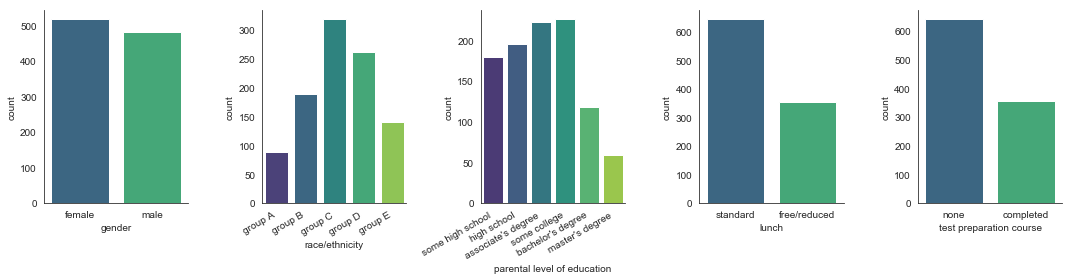

In [8]:
fig, ax = plt.subplots(1,5, figsize=(15,4), sharey = False)

sns.countplot(x='gender', data=students, palette='viridis', ax=ax[0])
sns.countplot(x='race/ethnicity', data=students, palette='viridis', ax=ax[1], order=['group A','group B','group C', 'group D','group E'])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
sns.countplot(x='parental level of education', palette='viridis', data=students, ax=ax[2], order=['some high school','high school','associate\'s degree','some college', 'bachelor\'s degree', 'master\'s degree'])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30, ha="right")
sns.countplot(x='lunch', data=students, palette='viridis', ax=ax[3])
sns.countplot(x='test preparation course', data=students, palette='viridis', ax=ax[4])
sns.despine()
plt.tight_layout()
plt.show()

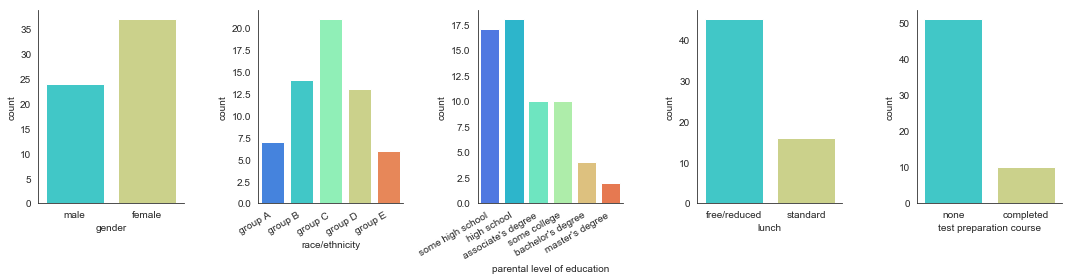

In [9]:
fig, ax = plt.subplots(1,5, figsize=(15,4), sharey = False)
low_students = students[(students['math score']<=40) | (students['reading score']<=40) | (students['writing score']<=40)]

sns.countplot(x='gender', data=low_students, palette='rainbow', ax=ax[0])
sns.countplot(x='race/ethnicity', data=low_students, palette='rainbow', ax=ax[1], order=['group A','group B','group C', 'group D','group E'])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
sns.countplot(x='parental level of education', palette='rainbow', data=low_students, ax=ax[2],order=['some high school','high school','associate\'s degree','some college', 'bachelor\'s degree', 'master\'s degree'])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30, ha="right")
sns.countplot(x='lunch', data=low_students, palette='rainbow', ax=ax[3])
sns.countplot(x='test preparation course', data=low_students, palette='rainbow', ax=ax[4])
sns.despine()
plt.tight_layout()
plt.show()

In [10]:
students.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


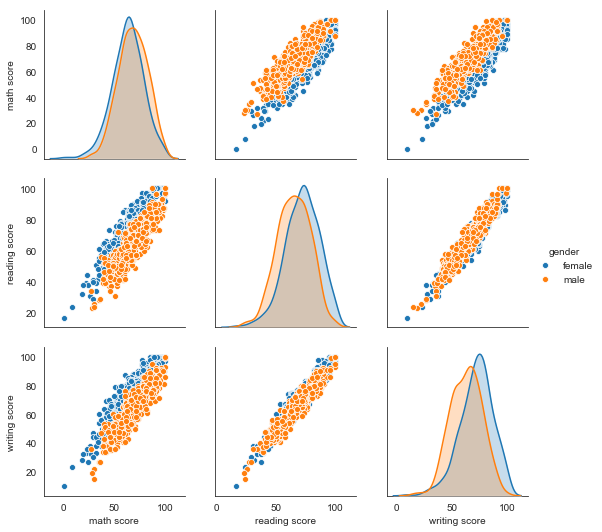

In [11]:
sns.pairplot(students, hue='gender')
plt.show()

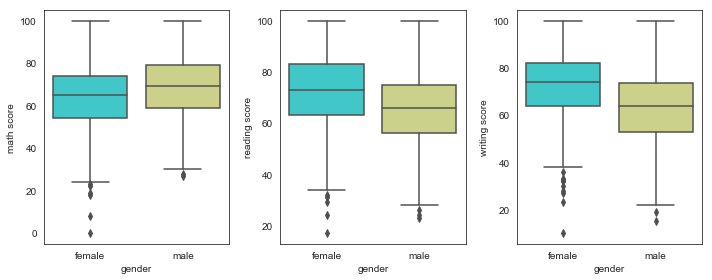

In [12]:
fig, ax = plt.subplots(1,3,figsize=(10,4))

sns.boxplot(x='gender', y='math score', data=students, ax=ax[0], palette='rainbow')
sns.boxplot(x='gender', y='reading score', data=students, ax=ax[1], palette='rainbow')
sns.boxplot(x='gender', y='writing score', data=students, ax=ax[2], palette='rainbow')
plt.tight_layout()
plt.show()

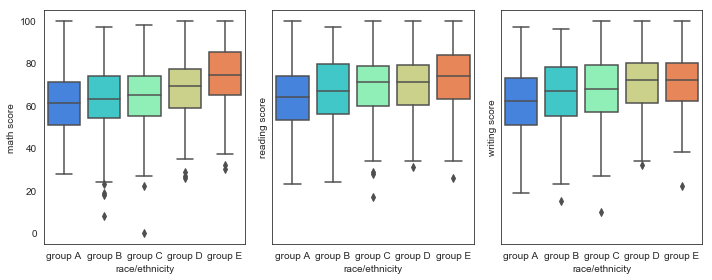

In [13]:
fig, ax = plt.subplots(1,3,figsize=(10,4), sharey=True)

sns.boxplot(x='race/ethnicity', y='math score', data=students, ax=ax[0], palette='rainbow',order=['group A','group B','group C', 'group D','group E'])
sns.boxplot(x='race/ethnicity', y='reading score', data=students, ax=ax[1], palette='rainbow',order=['group A','group B','group C', 'group D','group E'])
sns.boxplot(x='race/ethnicity', y='writing score', data=students, ax=ax[2], palette='rainbow',order=['group A','group B','group C', 'group D','group E'])
plt.tight_layout()
plt.show()

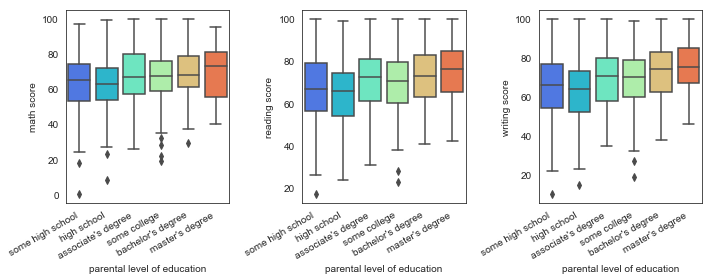

In [14]:
fig, ax = plt.subplots(1,3,figsize=(10,4))

sns.boxplot(x='parental level of education', y='math score', data=students, ax=ax[0], palette='rainbow',order=['some high school','high school','associate\'s degree','some college', 'bachelor\'s degree', 'master\'s degree'])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, ha="right")
sns.boxplot(x='parental level of education', y='reading score', data=students, ax=ax[1], palette='rainbow',order=['some high school','high school','associate\'s degree','some college', 'bachelor\'s degree', 'master\'s degree'])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
sns.boxplot(x='parental level of education', y='writing score', data=students, ax=ax[2], palette='rainbow',order=['some high school','high school','associate\'s degree','some college', 'bachelor\'s degree', 'master\'s degree'])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.show()

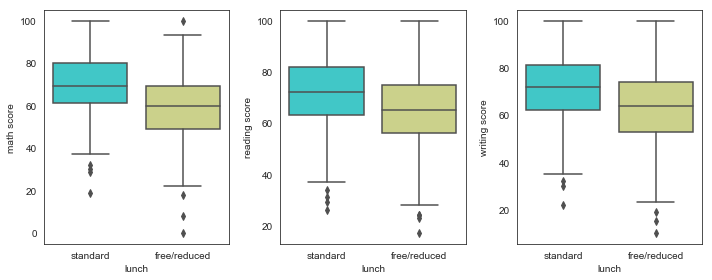

In [15]:
fig, ax = plt.subplots(1,3,figsize=(10,4))

sns.boxplot(x='lunch', y='math score', data=students, ax=ax[0], palette='rainbow')
sns.boxplot(x='lunch', y='reading score', data=students, ax=ax[1], palette='rainbow')
sns.boxplot(x='lunch', y='writing score', data=students, ax=ax[2], palette='rainbow')
plt.tight_layout()
plt.show()

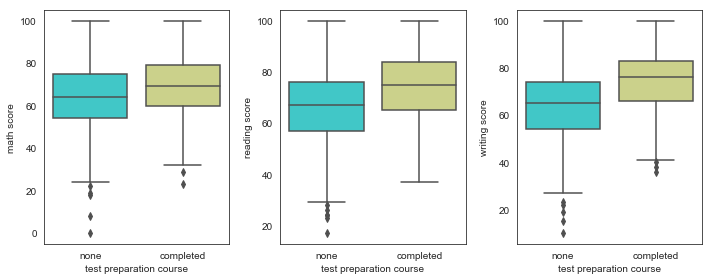

In [16]:
fig, ax = plt.subplots(1,3,figsize=(10,4))

sns.boxplot(x='test preparation course', y='math score', data=students, ax=ax[0], palette='rainbow')
sns.boxplot(x='test preparation course', y='reading score', data=students, ax=ax[1], palette='rainbow')
sns.boxplot(x='test preparation course', y='writing score', data=students, ax=ax[2], palette='rainbow')
plt.tight_layout()
plt.show()

## Question

From the data visuals above we can get a few clues that might not be surprising, students who complete the test preparation course usually score higher than those who don't; students whose parents hold master's degree in general do better in tests; female students do very well in reading and writing while male students are do better in maths.

One thing that might be insteresting is that it seems like students who have standard lunch score considerably higher in all three subjects than students who have free/reduced lunch. Does lunch quality play an important role in students' test scores?

In [23]:
bad_lunch = students[students['lunch']=='free/reduced']
good_lunch = students[students['lunch']=='standard']

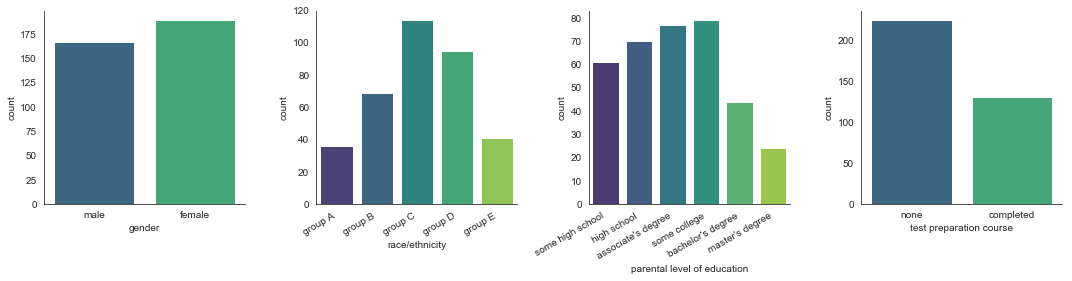

In [21]:
fig, ax = plt.subplots(1,4, figsize=(15,4), sharey = False)

sns.countplot(x='gender', data=bad_lunch, palette='viridis', ax=ax[0])
sns.countplot(x='race/ethnicity', data=bad_lunch, palette='viridis', ax=ax[1], order=['group A','group B','group C', 'group D','group E'])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
sns.countplot(x='parental level of education', palette='viridis', data=bad_lunch, ax=ax[2], order=['some high school','high school','associate\'s degree','some college', 'bachelor\'s degree', 'master\'s degree'])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30, ha="right")
sns.countplot(x='test preparation course', data=bad_lunch, palette='viridis', ax=ax[3])
sns.despine()
plt.tight_layout()
plt.show()

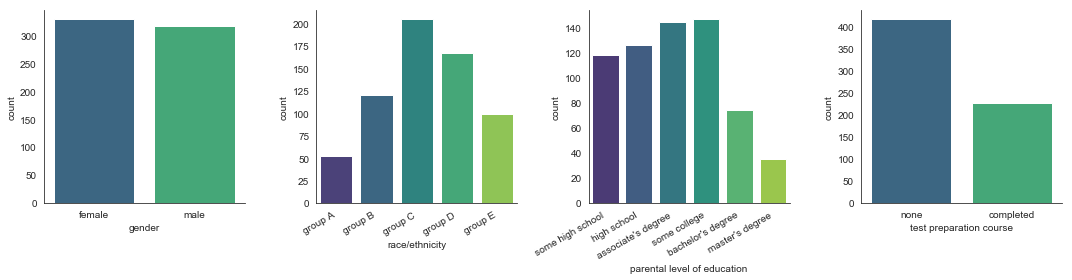

In [24]:
fig, ax = plt.subplots(1,4, figsize=(15,4), sharey = False)

sns.countplot(x='gender', data=good_lunch, palette='viridis', ax=ax[0])
sns.countplot(x='race/ethnicity', data=good_lunch, palette='viridis', ax=ax[1], order=['group A','group B','group C', 'group D','group E'])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
sns.countplot(x='parental level of education', palette='viridis', data=good_lunch, ax=ax[2], order=['some high school','high school','associate\'s degree','some college', 'bachelor\'s degree', 'master\'s degree'])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30, ha="right")
sns.countplot(x='test preparation course', data=good_lunch, palette='viridis', ax=ax[3])
sns.despine()
plt.tight_layout()
plt.show()

The plots above showed that lunch quality of the students is an independent variable that is unlikely to be linked with other social status. With this info, we can perform an experiment.

# Experimentation

## 1. Hypothesis

By improving students' lunch quality we can improve their performance on maths, reading and writing tests.

## 2. Experimentation Design

We will randomly devided the students who have free/reduced lunch into two groups, one group will keep their lunch routine and the other group will be provided with standard lunch for the next two months. The variable of interest is test scores on maths, reading and writing.

We will record the test scores for both groups for two months before the study and compare the results between the two groups.

If the average test scores in maths, reading and writing improves by 10% among students who receive standard quality lunch, and show clear difference from students who keeps their poor lunch routine, conlude that lunch quality does impact students performance on tests. If their test scores improve less than 10%, observe for two more months before deciding, if there's no clear difference between the two groups or the standard lunch group perform less than the free/reduced lunch group, conclude that lunch quality doesn't impact students' performance at all.

## 3. Secondary Metrics

We can separately compare the results among female students and male students and see if lunch impact one gender more than the other, similar results can be generated among different ethnicities and parental education levels.